# Getting started
As soon as you activated Anaconda via the alias apy3 <enter> you may start working with data science projects. The first example below will introduce you to the tool chain with a simple linear regression problem. This document is an addendum to the Python based machine learning
lecture. (SS 2017 and later terms).

(C) P. Sykacek 2017 - 2020 <peter.sykacek@boku.ac.at>

## Getting information
The perhaps most important advice for getting into machine learning is to start practice as soon as possible. Knowing the details of a tool chain is not a prerequisite as we can always consult the online help. In particular the package sklearn comes with an excellent online help which we may search with google. Since details about the meaning of different model and function parameters is always at hand, the skillfull machine learner should focus on how the different parts of the tool chain interact. In combination with an understanding of the implications of noise on a data scientists job, an understanding of different model classes and remembering the "no free lunch theorem" this is a good starting point.

## Regression with sklearn
### Data generation
The code in the next cell generates noisy observations from a known linear model. Toy data based analysis is here used to introduce sklearn. Toy data is in general useful for investigating properties of models. We will subsequently use it to fit our fist model and investigate its performance.

In [83]:
## decide whether we run code in google colab amd access the google drive or 
## whether we run locally
incolab=False
if incolab:
  ## we mount the drive and set the basepath
  from google.colab import drive
  drive.mount('/content/drive')
  basepath="/content/drive/My Drive/exercise4colab.4students/"
else:
  ## we run locally and basepath is the parent directory 
  basepath="../"
### ml_lib.py resides in <basepath>/course.lib and contains course relevant
### library functions. To allow loading it we set a temporary path to
### the directory
import sys
sys.path.append(basepath+"course.lib/")
import ml_lib as mlib
##########################################################
# Step 1:
# Regression with sklearn.
#
# import numpy, and plotting
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# We generate two one dim datasets with a moderate number of samples: 
Nsmpl=25
indim=1 
# offset 2 slope -3
theta_true=np.array([[2],[-3]])
# column wise concatenation of arrays (gives a Nsmpl x 2 dim array)
Xtran=np.concatenate((np.ones((Nsmpl, 1)), 
                      np.random.normal(loc=0.0, scale=3.0, size=(Nsmpl, 1))), 
                     axis=1)
noise_sd=3.0
# generate noisy predictions.
# Reminder: Xtran.dot(theta_true) stands for Xtran (matrix *) theta_true
# +np.random.normal(...) adds Gaussian random variates as resuidual.
ylin=Xtran.dot(theta_true)+np.random.normal(loc=0.0, scale=noise_sd, size=(Nsmpl, 1))
# xlin is the second column (index 1) of Xtran
xlin=np.array([list(Xtran[:, 1])]).T
Xsrt=np.sort(Xtran, axis=0)
# for visualisation as lines we order the data according to incerasing X values.
ylin_noiseless=Xsrt.dot(theta_true)
xlin_noiseless=np.array([list(Xsrt[:,1])]).T

## Fitting a linear model

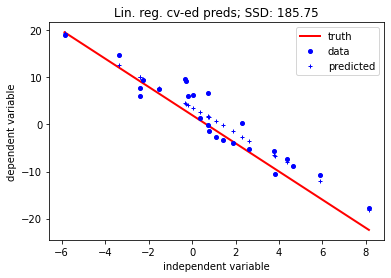

In [84]:
# linear model:
from sklearn import linear_model as lm
# define a linear regression object:
reg = lm.LinearRegression()   # default adds intercept! Thus providing xlin.
# all sklearn model types have a function fit(..) which fits the model 
reg.fit(xlin, ylin)
# all sklearn model types have a function predict which applies models to new input.
# here we generate predictions on the training inputs using the optimised model.
ylpred=reg.predict(xlin)
# SSD between predictions and noisy y's (assesses the goodness of fit).
acc=np.sum((ylpred-ylin)**2)
tstr='Lin. reg. cv-ed preds; SSD: {0:.2f}'.format(acc)
# generate plots
myfig=plt.figure()
plt.clf()
# ideal predictions (noiseless observations)
plt.plot(xlin_noiseless, ylin_noiseless, 'r-', linewidth=2, label='truth')
# training data
plt.plot(xlin, ylin, 'bo', markersize=4, label='data')
# predicted values
plt.plot(xlin, ylpred, 'b+', markersize=4, label='predicted')
plt.ylabel('dependent variable')
plt.xlabel('independent variable')
plt.title(tstr)
plt.legend(loc=1)
# show the plot.
plt.show() # observe that the predictions are closer to  truth as the datapoints
# write result into a pdf file.
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages('sklearn_linreg_on_training.pdf') as pdf:
    pdf.savefig(myfig)

# Exercise

We learned in the theory part that the previous approach of using
training data to evaluate the predictive accuracy of a model has the
tendency of overestimating how good we fit. Although the problem is
more substantial for nonlinear models, it also appears in this linear
case.  To investigate the issue further, we will as a next step use a
10 fold cross testing approach.

This is an exercise to be done by all participants.
Some hints:
A) Use exactly the same data that was used above.
   This allows us to directly compare the accuracies
   we get. What is your expectation? Will the SSD in the
   second plot title be larger or smaller?
B) The function for cross testing in sklearn is called
   sklearn.model_selection.cross_val_predict
   Use the online help of sklearn to find out how to use it
   to get 10 fold cross validated predictions.
C) The result should be an identical plot as above
   however saved under the name 'sklearn_linreg.pdf'.
   Do not reinvent the wheel: you may cut and paste the above
   code and apply the required modifications.

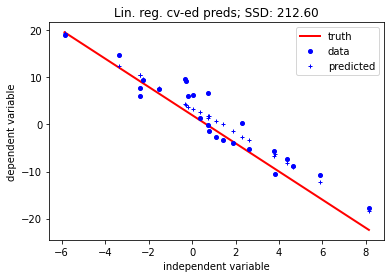

In [85]:
### Your code goes here! Observe the difference in SSD between the previous and this solution. 
### Have you got an explanation why the ""+"" symbols (the predictions from independent 
### test inputs) which are on one line in the previous plot do no longer allign?

from sklearn.model_selection import cross_val_predict as cvp # cross validaton predictions
# linear model:
from sklearn import linear_model as lm
# linear regression object:
reg = lm.LinearRegression()   # default is using an intercept! (not required in X)
# fit to linear data and obtain cross validation accuracy.
# we do a twenty fold cross testing
nfolds=20
nproc=-1     # use nproc cpus (cores) -1 uses all...
# simply by calling cvp:
ylmpred=cvp(reg, xlin, ylin, cv=nfolds, n_jobs=nproc)
# calculate generalisation SSD and plot predicitions over datapoints and truth.
genacc=np.sum((ylmpred-ylin)**2)
# title string {0:.2f} reads as take the first argument
# of "format", and truncate the float after 2 decimal points
tstr='Lin. reg. cv-ed preds; SSD: {0:.2f}'.format(genacc)
# plots
myfig=plt.figure()
plt.clf()
plt.plot(xlin_noiseless, ylin_noiseless, 'r-', linewidth=2, label='truth')
plt.plot(xlin, ylin, 'bo', markersize=4, label='data')
plt.plot(xlin, ylmpred, 'b+', markersize=4, label='predicted')
plt.ylabel('dependent variable')
plt.xlabel('independent variable')
plt.title(tstr)
plt.legend(loc=1)
plt.show() # note that predictions are closer to  truth as the datapoints
           # this is the "smoothing" effect of modeling. A question 
           # worth thinking about: Why are the predicted values not on
           # one line? After all we fit a linear model...
           # A: This is a result from different folds providing 
           # different parameter estimates...
from matplotlib.backends.backend_pdf import PdfPages
with PdfPages(basepath+'resfigs/sklearn_linreg.pdf') as pdf:
    pdf.savefig(myfig)


## Kernel methods
Kernel methods are a modern approach to nonlinear regression (and classification). 
The methods make use of the so called "kernel trick" to express inner products in high dimensional spaces efficiently by applying a kerbel to pairs of input samples. The sklearn library provides several methods for kernel regression. Besides kernel ridge regression, gaussian process regression GPR is also closely related. To get started with a nonlinear approach, we apply kernel ridge regression to a toy data set: the noisy sine wave.

### Data generation

In [86]:
Nsmpl=200
# generate a nonlinear prediction (noisy sine wave)
xnl=np.random.uniform(size=(Nsmpl, 1))*2*np.pi
sdn=0.5;
ynl=np.sin(xnl)+np.random.normal(loc=0.0, scale=sdn, size=(Nsmpl, 1))
ynl_ssd_tot=np.sum((ynl-np.mean(ynl))**2)
xnl_noiseless=np.sort(xnl, axis=0)
ynl_noiseless=np.sin(xnl_noiseless)

### Model fitting and kernel ridge regression (KRR)
To get an unbiased SSD estimate, will we need two levels of cross validation: level one for estimating generalisation accuiracies and level two (inside level one) for hyperparameter tuning. To model data with kernel ridge regression we instantiate in sklearn objects of type 
"sklearn.kernel_ridge.KernelRidge". For cross validated predictions we use cvp as we did in the linear case. As an additional aspect of KRR we have to consider setting hyperparameters optimally. We will do this by means of a grid search cross validation which tests all combinations of the individual hyperparameter values we provide as input. For hyperparameter optimisation sklearn provides the datatype sklearn.model_selection.GridSearchCV which is parameterised by every sklearn machine learning model. In sklearn the objects of type GridSearchCV have the same properties as native machine learning methods. This allows for a very simple nesting of hyperparameter validation within generalisation predictions.

In [87]:
from sklearn.kernel_ridge import KernelRidge as KRR
# for cross validating the hyper parameters we use GSCV
# As the name suggests this uses a grid search over hyperparameters
# in a cross validation setting and finds the best hyper parameter value
from sklearn.model_selection import GridSearchCV as GSCV
# Kfold is required to repeatedly get different cv splits
# from the data. We could also reshuffle the dataset in each simulation
# The different orderings will demonstrate that there is variation
# in the two evaluation schemes.
from sklearn.model_selection import KFold

from sklearn.metrics import r2_score

#define number of folds
n_folds = 10
n_trials = 20

#intialize variables
all_opt_alpha = []
all_opt_gamma = []
cv_scores = np.zeros((n_trials,1))
ct_scores = np.zeros((n_trials,1))

for i in range(n_trials):
    print(f"Simulation: {i}")
    outer_cv = KFold(n_splits=n_folds,shuffle=True,random_state=i)
    inner_cv = KFold(n_splits=n_folds, shuffle=True,random_state=i)
    cvkr = GSCV(KRR(kernel="rbf", gamma=0.1), cv = inner_cv,
    param_grid={"alpha": np.linspace(0,2,10),
                "gamma": np.linspace(0,1,10)},n_jobs=-1)
    cvkr.fit(xnl, ynl)
    #store hyperparameters
    all_opt_alpha.append(cvkr.cv_results_["param_alpha"][cvkr.best_index_])
    all_opt_gamma.append(cvkr.cv_results_["param_gamma"][cvkr.best_index_])
    cv_scores[i] = cvkr.best_score_
    
    ynl_hat = cvp(cvkr, X=xnl, y=ynl, cv=outer_cv, n_jobs=-1)
    
    ct_scores[i] = r2_score(ynl,ynl_hat)


    
print(all_opt_alpha)
print(all_opt_gamma)
print(cv_scores)
print(ct_scores)

Simulation: 0
Simulation: 1
Simulation: 2
Simulation: 3
Simulation: 4
Simulation: 5
Simulation: 6
Simulation: 7
Simulation: 8
Simulation: 9
Simulation: 10
Simulation: 11
Simulation: 12
Simulation: 13
Simulation: 14
Simulation: 15
Simulation: 16
Simulation: 17
Simulation: 18
Simulation: 19
[0.2222222222222222, 0.2222222222222222, 0.4444444444444444, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.4444444444444444, 0.2222222222222222, 0.2222222222222222, 0.4444444444444444, 0.4444444444444444, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222]
[0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.2222222222222222, 0.1111111111111111, 0.2222222222222222, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.2222222222222222, 0.1111111111111111, 0.111111

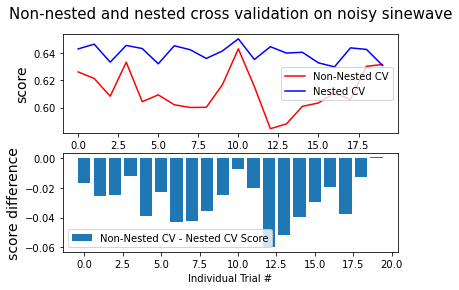

<ipython-input-88-a1a4ff59331f>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['alpha', 'gamma'])


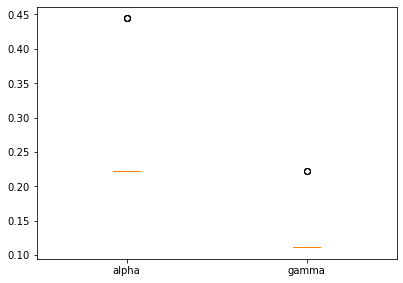

In [88]:
# plot 
myfig=plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(cv_scores, color='r')
nested_line, = plt.plot(ct_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           #bbox_to_anchor=(0, .4, .5, 0), 
           loc=0)
plt.title("Non-nested and nested cross validation on noisy sinewave",
          x=.5, y=1.1, fontsize="15")

score_difference = cv_scores - ct_scores

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(n_trials), score_difference[:,0])
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           #bbox_to_anchor=(0, 1, .8, 0)
           loc=0)
plt.ylabel("score difference", fontsize="14")

plt.show()
#with PdfPages(basepath+'resfigs/sklearn_nonlin_mnsqrerr_cv.pdf') as pdf:
    #pdf.savefig(myfig)

parameters = [all_opt_alpha, all_opt_gamma]

fig = plt.figure(figsize =(5, 3.5))
ax = fig.add_axes([0,0,1,1])
ax.set_xticklabels(['alpha', 'gamma'])
bp = ax.boxplot(parameters)
# show plot
plt.show()

## Self study exercise for KRR
1. In Python KRR is provided via the data type “sklearn.kernel ridge.KernelRidge”.
2. We need to select a kernel function (suggestion: rbf) for calculating the inner products. The rbf kernel has the kernel width γ as one one parameter but the solution of KRR also depends on the choice of α.
3. Both parameters need to be adjusted by cross validation (CV). Python provides for this purpose the type “sklearn.model selection.GridSearchCV”.
4. To get unbiased generalisation predictions, we should nest cross validation within cross testing (CT(CV)). This can be done by cvp from before and passing the GridSearchCVobject as “learning function”.
5. To see the effect of overfitting by cross validation we want to compare the scores obtained from cv with the same score obtained by CT(CV) and CV.
6. It is also of interest to derive all characterisations on randomly permuted datasets. (See the online example of CV).
7. The dependency of permutation should be illustrated by several plots: 1) the traces of scores, 2) the traces of the optimal α’s and γ’s (use a pandas dataframe and pandas.boxplot) and 3) plots of training data, predictions averaged over the permutation runs and the ideal curve.
8. Construct as training data one cycle of the noisy since wave, adding Gaussian random noise with std dev 0.5.

More detailed instructions for this exercise are found in the comments in the next cell.

In [89]:
##################################################################
# nonlinear regression
#
# Dealing with a nonlinear problem requires to adjust hyper
# parameters. To get an unbiased SSD estimate, will we need two levels
# of cross validation: level one for estimating generalisation
# accuracies and level two (inside level one) for hyperparameter
# tuning. The final result from this simulation should allow us to
# compare the scores reached by a one level cross validation with the
# scores reached by a two level (cross test (cross validate))
# CT(CV). The former represents model performance by the (biased)
# score obtained from the optimal hyperparameter combination found
# with cross validation.  The second nested approach applies cross
# validation inside cross testing.  We will hence obtain unbiased
# scores and can also get an idea of the variablity of the optimal
# hyper parameters. As a side result we will also obtain unbiased
# predictions which we may plot subsequently.  In order to invetstiage
# whether model fitting dependends strongly on random fluctuations, we
# will repeat this comparison several times on randomly permuted
# versions of the same data and record all derived features in
# respectively dimensioned vectors.
# 
# We apply for nonlinear regression a ML method called kernel ridge
# regression (KRR). The sklearn data type for this model is called:
# sklearn.kernel_ridge.KernelRidge
# 
# Kernel ridge regression is an approach which generalises RBF
# methods. It maps the inputs into a space called a "reproducing
# kernel Hilbert space" (RKHS). Phi(x) is a conventional nonlinear
# mapping as introduced by the ML model to obtain a feature space
# capable of representing a nonlinear problem in input space as a
# linear problem in the projection space. A speciality of KRR is a
# property of the RBF kernel. The kernel is a Mercer kernel which
# gives rise to the so called "kernel trick". We may reexpress an
# expression which we found important in calculating optima: Phi(x)^T
# * Phi(x') can be calculated as K(x, x'). The significance of this
# expression is the possibility to calculate the inner product in the
# high dimensional feature space as a function of the inner product in
# the much smaller dimensional input space. The kernel trick is an
# important aspect of nonlinear support vector machines and here used
# in a different context.  From the application point of view it is
# important to note that KRR has two important hyper parameters: gamma
# controls the kernel witdh of the RBF. The larger gamma the more
# pronounced the peakedness of the kernel (stronger locality, lesss
# smothing over nearby input space). The seocnd hyper parameter is the
# "ridge parameter" alpha which is the weight we give to the
# regression parameter penalty in the regularised SSD. (See lecture
# notes). Larger alpha implies a stronger focus on smoothness of the
# solution. We need thus cross validate over alphas and gammas. (See
# the online help of sklearn for a useful starting point).
# 
# The solution of this exercise should be separated into smaller parts:
# A) Generate training data from a noisy sine wave ground truth.
#    The following parameters should be adjustable:
#    Nsmpl (test the script with 100 and 200 samples)
#    sdn (std. deviation of residual noise - use 0.5)
#    nfolds (try 10 and 20)
# B) Based on that data we estimate the stability (dependency on 
#    random perturbations) of all algorithmic properties in a loop:
#    NoTrials is the variable which should code for the number of 
#    iterations of that loop.
#    The loop should record:
#    a) The optimal alpha and gamma found in each iteration. 
#       store them in lists all_opt_alpha and all_opt_gamma
#    b) The unbiased predictions from the outer cross testing
#       loop. (We could expand that to doing both the biased CV
#       predictions and the unbiased CT predictions but that requires
#       more coding "by hand". The predictions should be stored in an
#       array all_preds of size (Nsmpl, NoTrials)
#    c) The optimal scores obtained from the biased CV predictions and
#       the unbiased CT predictions. Store them in a numpy (NoTrials,
#       1) dim array (column vector) Note that cross validation for
#       KRR calculates the coefficient of determination as score.
#       This score is available as sklearn.metrics.r2_score and should
#       be manually applied to the predictions we extract from cross testing.
#     
#    You will need functions "sklearn.model_selection.GridSearchCV"
#    "sklearn.model_selection.cross_val_predict" for cross validation
#    and testing. Randomisation is based on random permutations of the
#    same dataset. To achieve that we need to pass properly
#    parametrised instances of class sklearn.model_selection.KFold
#    as "cv" parameters in the previous validation functions. Note
#    that there is an example in the online documentation of sklearn.
#    
# Once the simulations are done, we would like to provide
# visualisations of the results.
#
# A) Provide two subplots (plt.subplot(211) and plt.subplot(212)).
#    The first subplot should display both score vectors and label
#    them correspondingly.  The second subplot should illustrate the
#    difference between the two scores over the loop index as bar
#    graph.  How do you interpret the result? Store the plot as 
#    'sklearn_nonlin_cv.pdf'
#
# B) A second graph should again use two subplots. The first one
#    should visualise the training data as a scatter plot, the ideal
#    noiseless prediction as a line plot and the average prdiction of
#    the NoTrials runs as scatter plot. The second scatter plot should
#    illustrate all alphas and betas as boxplot (hint: convert the
#    hyper parameters to a pandas dataframe and use pandas.boxplot.)
#    The second graph should be stored as
#    'sklearn_nonlin_generalising_preds.pdf'

#### Your code goes here:



In [90]:
## generate the plots have look at the tutorials in sklearn for an example!
## Do the scores make any sense?

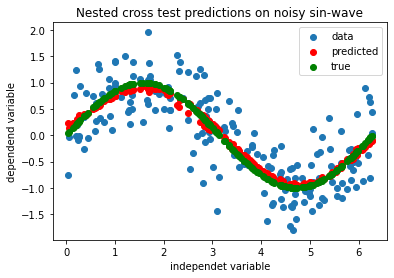

In [91]:
plt.scatter(xnl,ynl, label = "data")
plt.scatter(xnl,ynl_hat, c = "r", label = "predicted")
plt.scatter(xnl, np.sin(xnl), c = "g", label ="true")
plt.xlabel("independet variable")
plt.ylabel("dependend variable")
plt.title("Nested cross test predictions on noisy sin-wave")
plt.legend(loc=0)

## Using mean square error as scorer

A careful investigation of the previous solution leads to the conclusion that the default scoring function (metric) in sklearn is the so called coefficient of determination. (R²=1-SSD<sub>resid</sub>/SSD<sub>total</sub>). In combination with the practice in sklearn to calculate the resulting metric of fold calculations as average (or expectation) accross folds, we get the problem that these scores are missleading. To circumvent that we may for example exchange the scorer by a mean square error scorer. An example how to do that is provided in the next cell.

In [92]:
# 10 fold cv
nfolds=10
# we do the simulation 20 times
NoTrials=20
# exchange the scorer in the cross validation setting. 
# We will set up sklearn to use the mean square error 
# instead of the r2_score as criterion.
from sklearn.metrics import make_scorer  
from sklearn.metrics import mean_squared_error
# the scorer needs to be made aware that smaller mean square error is preferred.
gcv_scorer=make_scorer(mean_squared_error, greater_is_better=False)

# stores mean square error from biased predictions which were used for assessing hyperparameters.
mnsqrerr_one_cv_layer=np.zeros((NoTrials, 1))
# stores mean square error for obtaining unbiased predictions.
mnsqrerr_two_cv_layers=np.zeros((NoTrials, 1))
# store predictions from nested cv (generate matrix and write into column)
all_preds=np.zeros((Nsmpl, NoTrials))
# store optimal hyperparameters (non nested)
all_opt_alpha=[]
all_opt_gamma=[]

for i in range(0,NoTrials):
    print("Sim: {0}".format(i))
    # run simulation NoTrials times. Both cvs reshuffle the data
    # to get variation.
    inner_cv = KFold(n_splits=nfolds, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=nfolds, shuffle=True, random_state=i)
    # set up the hyper parameter ridge regression for an rbf kernel.
    # alpha refers to the weight of the Ridge penalty (alpha*W.T*W)
    # gamma sdjusts the RBF kernel withd. We search exhaustively over 
    # the grid of both.
    # np.logspace(-2, 2, 5) cerates 5 values between 10^-2 and 10^2 
    # which are evenly appart on log scale: we get 10^(-2 -1, 0, 1, 2).
    # addition: we provide the scorer parameter to GSCV
    cvkr = GSCV(KRR(kernel='rbf', gamma=0.1), cv=inner_cv,
                param_grid={"alpha": [10.0, 6.0, 5.5, 5.0, 4.5, 1.0, 0.1],
                            "gamma": np.logspace(-2, 2, 11)}, scoring=gcv_scorer, n_jobs=-1)
    cvkr.fit(xnl, ynl)
    # store the optimal hyperparameters
    all_opt_alpha.append(cvkr.cv_results_['param_alpha'][cvkr.best_index_])
    all_opt_gamma.append(cvkr.cv_results_['param_gamma'][cvkr.best_index_])
    # we get the ssd as best score from the GridSearch:
    mnsqrerr_one_cv_layer[i] = cvkr.best_score_
    # Nested CV with parameter optimization on the Training folds and
    # predictions on the test folds. The trick is to use cvrk as
    # parameter in cvp to construct a cv inside cv.
    ynl_hat = cvp(cvkr, X=xnl, y=ynl, cv=outer_cv, n_jobs=1)
    # carefull with type - Python wants both sides 
    # being one dim arrays (aka vectors)
    all_preds[:, i]=ynl_hat[:,0]
    #ssds_two_cv_layers[i] = np.sum((ynl_hat-ynl)**2)
    # call the scoring function we provided to GSCV
    mnsqrerr_two_cv_layers[i] = -mean_squared_error(ynl, ynl_hat)
# calculate the non nested score minus the nested score.
# mnsqrerr_two_cv_layers=-mnsqrerr_two_cv_layers
score_difference =  mnsqrerr_two_cv_layers - mnsqrerr_one_cv_layer


Sim: 0
Sim: 1
Sim: 2
Sim: 3
Sim: 4
Sim: 5
Sim: 6
Sim: 7
Sim: 8
Sim: 9
Sim: 10
Sim: 11
Sim: 12
Sim: 13
Sim: 14
Sim: 15
Sim: 16
Sim: 17
Sim: 18
Sim: 19


### Our plots finally confirm the tendency that non nested cv provides biased performance estimates

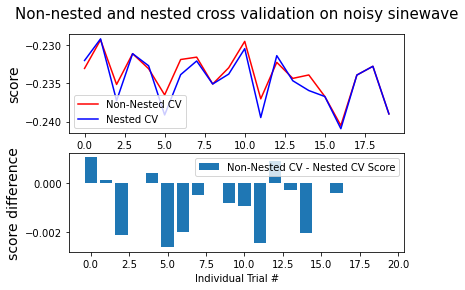

In [93]:
# plot 
myfig=plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(mnsqrerr_one_cv_layer, color='r')
nested_line, = plt.plot(mnsqrerr_two_cv_layers, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           #bbox_to_anchor=(0, .4, .5, 0), 
           loc=0)
plt.title("Non-nested and nested cross validation on noisy sinewave",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NoTrials), score_difference[:,0])
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           #bbox_to_anchor=(0, 1, .8, 0)
           loc=0)
plt.ylabel("score difference", fontsize="14")

plt.show()
with PdfPages(basepath+'resfigs/sklearn_nonlin_mnsqrerr_cv.pdf') as pdf:
    pdf.savefig(myfig)


### 1.2) Application to nonlinear prediction problems
As final exercise we will use two nonlinear regression problems from NIST. To prepare this, 
you will first test your implementation on one of the datasets - see below for instructions.
### Loading nonlinear NIST regression data

['Misra1a', 'DanWood', 'Hahn1', 'Roszman1', 'Nelson', 'Gauss1']
NIST study involving dental research in monomolecular
    adsorption. The response variable is volume, and the predictor
    variable is pressure.


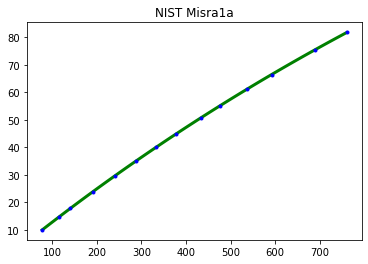

In [94]:
## decide whether we run code in google colab and access the google drive or 
## whether we run locally
#incolab=True
#if incolab:
#  ## we mount the drive and set the basepath
#  from google.colab import drive
#  drive.mount('/content/drive')
#  basepath="/content/drive/My Drive/exercise4colab.4students/"
#else:
#  ## we run locally and basepath is the parent directory 
#  basepath="../"
### ml_lib.py resides in <basepath>/course.lib and contains course relevant
### library functions. To allw loading it we set a temporary path to
### the directory
#import sys
#sys.path.append(basepath+"course.lib/")
#import ml_lib as mlib

## for loading nonlinear NIST regression data you may use library nistnlreg.
import matplotlib.pyplot as plt
import nistnlreg as nnl
## important: we have to set the base directpry for compatibility with 
## colab and local computation
nnl.setbasedir(basepath)
print(nnl.nistnlrg_names)
## After instantiating NISTnlReg we may for example load "Misra1a"
nnldat=nnl.NISTnlReg()
X, y=nnldat.getdata("Misra1a")
## information about the data is avaliable via getlegend()
print(nnldat.getlegend("Misra1a"))
## the NIST certified predcitor of the data is available 
## via getpredictor(). The returned function predf() as constructed below 
## can be called with data which is compatible with the above X. 
## It produces output compatible with the above y.
predf=nnldat.getpredictor("Misra1a")
## To get an impression of the data and certified predictor, you may 
## visualise a NIST dataset via function illustrate:
myfig=nnldat.illustrate("Misra1a")
plt.show()

E.S.Keeping, Introduction to Statistical Inference, Van Nostrand
    Company, Princeton, NJ, 1962, p. 354. The response variable is
    energy radiated from a carbon filament lamp per cm**2 per second,
    and the predictor variable is the absolute temperature of the
    filament in 1000 degrees Kelvin.


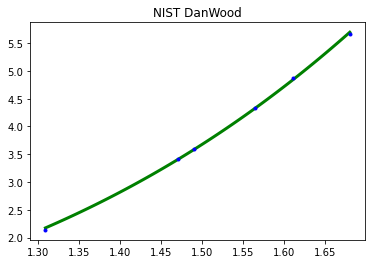

In [95]:
print(nnldat.getlegend("DanWood"))
myfig=nnldat.illustrate("DanWood")
plt.show()

These data are the result of a NIST study involving the thermal
    expansion of copper. The response variable is the coefficient of
    thermal expansion, and the predictor variable is temperature in
    degrees kelvin. 


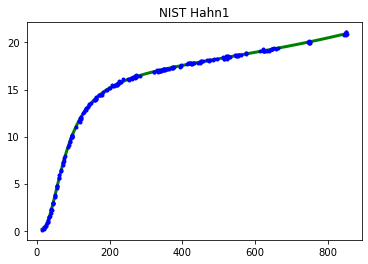

In [96]:
print(nnldat.getlegend("Hahn1"))
myfig=nnldat.illustrate("Hahn1")
plt.show()

These data are the result of a NIST study involving quantum defects
    in iodine atoms. The response variable is the number of quantum
    defects, and the predictor variable is the excited energy
    state. The argument to the ARCTAN function is in radians.


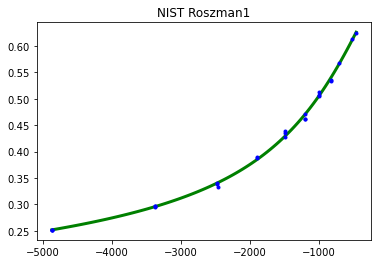

In [97]:
print(nnldat.getlegend("Roszman1"))
myfig=nnldat.illustrate("Roszman1")
plt.show()

These data are the result of a study involving the analysis of
    performance degradation data from accelerated tests, published in
    IEEE Transactions on Reliability. The response variable is
    dialectric breakdown strength in kilo-volts, and the predictor
    variables are time in weeks and temperature in degrees Celcius.
(10000, 2)


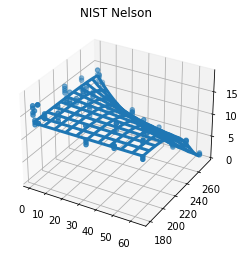

In [98]:
print(nnldat.getlegend("Nelson"))
myfig=nnldat.illustrate("Nelson")
plt.show()

The data are two well-separated Gaussians on a decaying 
    exponential baseline plus normally distributed zero-mean noise with 
    variance = 6.25


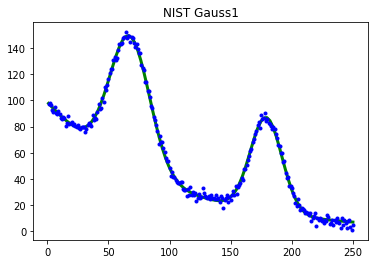

In [99]:
print(nnldat.getlegend("Gauss1"))
myfig=nnldat.illustrate("Gauss1")
plt.show()

## Nonlinear regression problems
Your next task is to compare a machine learning based predictor for *two selected NIST datasets* against the NIST reference predictor.
You may load the data of the NIST dataset *nistnam* with the command: 

X, y=nnldat.getdata(*nistnam*) 

The reference predictor is compatible with the respective X, y data structure. This imples that you must provide a matrix which agrees in shape with X and y  and contains values which are plausible under the NIST data distribution (e.g. range of values). The reference predoctor may be obtained with the command:

predf=nnldat.getpredictor(*nistnam*)

*nistnam* being any of the following strings: ['Misra1a', 'DanWood', 'Hahn1', 'Roszman1', 'Nelson', 'Gauss1']

### Your solution should consider the following aspects:

1. Which nonlinear predictors do you want evaluate against the NIST reference solution? An obvious candidate is kernel ridge regression KRR which was used before. Alternative choices would be MLPRegressor or GaussianProcessRegressor (Note that GPR has a potentially high computational demand if fit to datasets with large sample sizes). 
2. Which metrics do you use for assessing the differences between predictors? Why would you use diferent metrics in the first place?
3. The minimum requirement of your soluion is applying *two* different architectures and assess the solutions with *three* different metrics. It s important to quantify generalisation performance and to make sure that the metrics are applied correctly.
4. Provide visualisations of the resulting functions in separate plots. These plots should look similat to the visualisations you obtain with nnldat.illustrate(*nistnam*)





In [100]:
## The following example assumes that you want to use
## the NIST "Gauss1" data as test case.
import nistnlreg as nnl
## important: we have to set the base directpry for compatibility with 
## colab and local computation
nnl.setbasedir(basepath)
## print(nnl.nistnlrg_names)
## After instantiating NISTnlReg we may for example load "Misra1a"
nnldat=nnl.NISTnlReg()
import numpy as np
## load the data
X, y=nnldat.getdata("Gauss1")
Nsmpl=X.shape[0]
## generate equally spaced data which stretches 5% beyond the range of X
nsmpl=200
xmin=min(X)
xmax=max(X)
fprg=(xmax-xmin)*0.05
xtst=np.linspace(xmin-fprg, xmax+fprg, nsmpl)
xtst.shape=(len(xtst), 1)
## continue with code which fits a nonlinear regression model:


## Try David

* with Gaussian Data

In [101]:
nnldat=nnl.NISTnlReg()
X, y=nnldat.getdata("Gauss1")

In [102]:
#define number of folds
n_folds = 10
n_trials = 5

#intialize variables
all_opt_alpha = []
all_opt_gamma = []
cv_scores = np.zeros((n_trials,1))
ct_scores = np.zeros((n_trials,1))

for i in range(n_trials):
    print(f"Simulation: {i}")
    outer_cv = KFold(n_splits=n_folds,shuffle=True,random_state=i)
    inner_cv = KFold(n_splits=n_folds, shuffle=True,random_state=i)
    cvkr = GSCV(KRR(kernel="rbf", gamma=0.1), cv = inner_cv,
    param_grid={"alpha": np.linspace(0,2,10),
                "gamma": np.linspace(0,1,10)},n_jobs=-1)
    cvkr.fit(xnl, ynl)
    #store hyperparameters
    all_opt_alpha.append(cvkr.cv_results_["param_alpha"][cvkr.best_index_])
    all_opt_gamma.append(cvkr.cv_results_["param_gamma"][cvkr.best_index_])
    cv_scores[i] = cvkr.best_score_
    
    ynl_hat = cvp(cvkr, X=X, y=y, cv=outer_cv, n_jobs=-1)
    
    ct_scores[i] = r2_score(y,ynl_hat)


    
print(all_opt_alpha)
print(all_opt_gamma)
print(cv_scores)
print(ct_scores)

Simulation: 0
Simulation: 1
Simulation: 2
Simulation: 3
Simulation: 4
[0.2222222222222222, 0.2222222222222222, 0.4444444444444444, 0.2222222222222222, 0.2222222222222222]
[0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111]
[[0.62620462]
 [0.62138596]
 [0.6084027 ]
 [0.63335475]
 [0.60437205]]
[[0.96718043]
 [0.97639783]
 [0.9719694 ]
 [0.97754192]
 [0.97357377]]


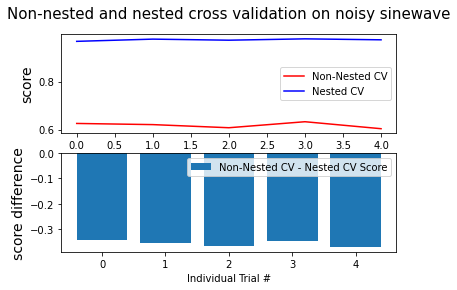

<ipython-input-103-a1a4ff59331f>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['alpha', 'gamma'])


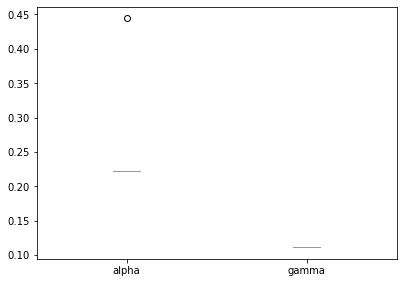

In [103]:
# plot 
myfig=plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(cv_scores, color='r')
nested_line, = plt.plot(ct_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           #bbox_to_anchor=(0, .4, .5, 0), 
           loc=0)
plt.title("Non-nested and nested cross validation on noisy sinewave",
          x=.5, y=1.1, fontsize="15")

score_difference = cv_scores - ct_scores

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(n_trials), score_difference[:,0])
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           #bbox_to_anchor=(0, 1, .8, 0)
           loc=0)
plt.ylabel("score difference", fontsize="14")

plt.show()
#with PdfPages(basepath+'resfigs/sklearn_nonlin_mnsqrerr_cv.pdf') as pdf:
    #pdf.savefig(myfig)

parameters = [all_opt_alpha, all_opt_gamma]

fig = plt.figure(figsize =(5, 3.5))
ax = fig.add_axes([0,0,1,1])
ax.set_xticklabels(['alpha', 'gamma'])
bp = ax.boxplot(parameters)
# show plot
plt.show()

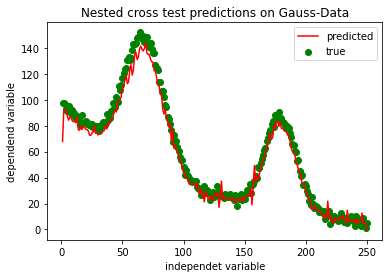

In [104]:
plt.plot(X,ynl_hat, c = "r", label = "predicted")
plt.scatter(X, y, c = "g", label ="true")
plt.xlabel("independet variable")
plt.ylabel("dependend variable")
plt.title("Nested cross test predictions on Gauss-Data")
plt.legend(loc=0)

* with misrala data

In [105]:
nnldat=nnl.NISTnlReg()
X, y=nnldat.getdata("Misra1a")

In [106]:
from sklearn.kernel_ridge import KernelRidge as KRR
# for cross validating the hyper parameters we use GSCV
# As the name suggests this uses a grid search over hyperparameters
# in a cross validation setting and finds the best hyper parameter value
from sklearn.model_selection import GridSearchCV as GSCV
# Kfold is required to repeatedly get different cv splits
# from the data. We could also reshuffle the dataset in each simulation
# The different orderings will demonstrate that there is variation
# in the two evaluation schemes.
from sklearn.model_selection import KFold

from sklearn.metrics import r2_score

#define number of folds
n_folds = 2
n_trials = 5

#intialize variables
all_opt_alpha = []
all_opt_gamma = []
cv_scores = np.zeros((n_trials,1))
ct_scores = np.zeros((n_trials,1))

for i in range(n_trials):
    print(f"Simulation: {i}")
    outer_cv = KFold(n_splits=n_folds,shuffle=True,random_state=i)
    inner_cv = KFold(n_splits=n_folds, shuffle=True,random_state=i)
    cvkr = GSCV(KRR(kernel="rbf", gamma=0.1), cv = inner_cv,
    param_grid={"alpha": [0,0.5,1,1.5,2],
                "gamma": [0,1,2,3,4,5]},n_jobs=-1)
    cvkr.fit(X, y)
    #store hyperparameters
    all_opt_alpha.append(cvkr.cv_results_["param_alpha"][cvkr.best_index_])
    all_opt_gamma.append(cvkr.cv_results_["param_gamma"][cvkr.best_index_])
    cv_scores[i] = cvkr.best_score_
    
    ynl_hat = cvp(cvkr, X=X, y=y, cv=outer_cv, n_jobs=-1)
    
    ct_scores[i] = r2_score(y,ynl_hat)


    
print(all_opt_alpha)
print(all_opt_gamma)
print(cv_scores)
print(ct_scores)

Simulation: 0
Simulation: 1


C:\Users\lilek\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


Simulation: 2
Simulation: 3
Simulation: 4
[0, 2, 1, 0.5, 0]
[0, 0, 0, 0, 0]
[[-0.26543006]
 [-0.88678698]
 [-0.91623267]
 [-0.27279919]
 [-0.02187329]]
[[-0.18473524]
 [-0.64487453]
 [-0.82249392]
 [-0.46351922]
 [-0.01631551]]


C:\Users\lilek\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:190: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


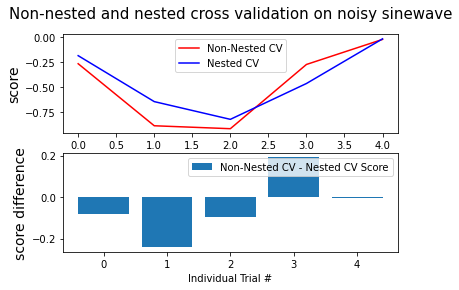

<ipython-input-107-a1a4ff59331f>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['alpha', 'gamma'])


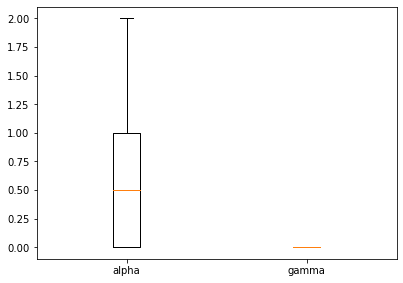

In [107]:
# plot 
myfig=plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(cv_scores, color='r')
nested_line, = plt.plot(ct_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           #bbox_to_anchor=(0, .4, .5, 0), 
           loc=0)
plt.title("Non-nested and nested cross validation on noisy sinewave",
          x=.5, y=1.1, fontsize="15")

score_difference = cv_scores - ct_scores

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(n_trials), score_difference[:,0])
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           #bbox_to_anchor=(0, 1, .8, 0)
           loc=0)
plt.ylabel("score difference", fontsize="14")

plt.show()
#with PdfPages(basepath+'resfigs/sklearn_nonlin_mnsqrerr_cv.pdf') as pdf:
    #pdf.savefig(myfig)

parameters = [all_opt_alpha, all_opt_gamma]

fig = plt.figure(figsize =(5, 3.5))
ax = fig.add_axes([0,0,1,1])
ax.set_xticklabels(['alpha', 'gamma'])
bp = ax.boxplot(parameters)
# show plot
plt.show()

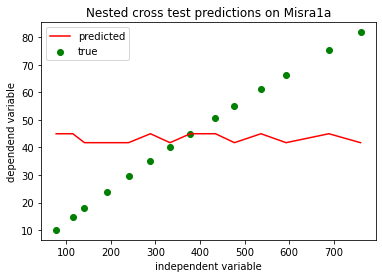

In [108]:
plt.plot(X,ynl_hat, c = "r", label = "predicted")
plt.scatter(X, y, c = "g", label ="true")
plt.xlabel("independent variable")
plt.ylabel("dependend variable")
plt.title("Nested cross test predictions on Misra1a")
plt.legend(loc=0)